<a href="https://colab.research.google.com/github/fabiodotcom/Data-Science/blob/main/Los_Angeles_Crime_Data_Analysis_Using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Los Angeles Crime Data Analysis Using Pandas**

![](https://drive.google.com/uc?export=view&id=1kesXdyR90PxKSJ0U9vhCGGqbRmAx3oHQ)

Photo by [Luca Micheli](https://unsplash.com/@lucamicheli) on [Unplash](https://unsplash.com/photos/ewspoqBfALg)


During my studies in Data Science using Pandas, I've reached a topic with discussions about crime analysis in the metropolis around the world. After some researches to find open data, I've decided to explore the data in Los Angeles city. Localized in the south of California, it's the second more peopled city in the United States (only behind New York), it's the center of the cinema and television industry.

[Pandas](https://pandas.pydata.org/) it's one of the most famous libraries for data science in Python, It's a powerful data analysis with many tools and methods to handle data manipulation.






## **About the Dataset**

The dataset that will be presented in the next lines is available on the [Los Angeles Open Data](https://data.lacity.org), for this purpose, I've used the dataset ["Crime Data from 2020 to Present"](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8), which covers crime incidents in Los Angeles between the years of 2020 and 2021. The original file has 28 columns and 220405 rows. The file has been pre-processed in [Jupyter Notebook](https://jupyter.org/), to remove some rows values and columns that will be not used in the analysis.

Below are all the variables in the dataset, followed by its description:

* `DR_NO` - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.
* `DATE OCC` - Date of crime occurrence(YYYY-MM-DD)
* `AREA` - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
* `AREA NAME` - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.
* `Rpt Dist No` - Code that represents a sub-area within a Geographic Area.
* `Crm Cd` - Indicates the crime committed.
* `Crm Cd Desc` - Defines the Crime Code provided.
* `Vict Age` - Indicates the age of the victim.
* `Vict Sex` - F: Female M: Male X: Unknown
* `Vict Descent` - Descent Code: **A** - Other Asian **B** - Black **C** - Chinese **D** - Cambodian **F** - Filipino **G** - Guamanian **H** - Hispanic/Latin/Mexican **I** - American Indian/Alaskan Native **J** - Japanese **K** - Korean **L** - Laotian **O** - Other **P** - Pacific Islander **S** - Samoan **U** - Hawaiian **V** - Vietnamese **W** - White **X** - Unknown **Z** - Asian Indian
* `Premis Cd` - The type of structure, vehicle, or location where the crime took place.
* `Premis Desc` - Defines the Premise Code provided.
* `Weapon Used Cd` - The type of weapon used in the crime. 
* `Weapon Desc` - Defines the Weapon Used Code provided.
* `LOCATION` - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
* `LAT` - Latitude Coordinate
* `LON` - Longitude Coordinate

## **Importing Libraries and Data**

In [ ]:
# importing libraries and files from google drive

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


In [ ]:
# creating the data frame and converting the 'DATE OCC' for DateTime format

df = pd.read_csv('/content/drive/My Drive/Colab DataFrames/Crime_Data_from_2020_to_Present.csv')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'],format='%Y-%m-%d')

## **Preliminary Analysis**

Before deep dive inside the data frame, we need to check his header, shape, variable types, column names, and the percentage of the missing values.

In [ ]:
# checking the dataset header

df.head()

,DR_NO,DATE OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,201220752,2020-09-16,12,77th Street,1259,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,700 E 73RD ST,33.9739,-118.2630
3,191501505,2020-01-01,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,14400 TITUS ST,34.2198,-118.4468


In [ ]:
# dataframe volume and data types

print('Rows:\t{}'.format(df.shape[0]))
print('Variables:\t{}'.format(df.shape[1]))
df.dtypes

Rows:	220405
Variables:	17


DR_NO                      int64
DATE OCC          datetime64[ns]
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Crm Cd                     int64
Crm Cd Desc               object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
LOCATION                  object
LAT                      float64
LON                      float64
dtype: object

In [ ]:
# column names

df.columns

Index(['DR_NO', 'DATE OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
# missing values percentage

(df.isnull().sum()).sort_values(ascending=False) / df.shape[0]

Weapon Desc       0.631528
Weapon Used Cd    0.631528
Vict Descent      0.131826
Vict Sex          0.131807
Premis Desc       0.000368
Premis Cd         0.000014
Crm Cd            0.000000
DATE OCC          0.000000
AREA              0.000000
AREA NAME         0.000000
Rpt Dist No       0.000000
LON               0.000000
Crm Cd Desc       0.000000
Vict Age          0.000000
LAT               0.000000
LOCATION          0.000000
DR_NO             0.000000
dtype: float64

## **Missing Data**

As we saw in the preliminary analysis, the dataset contains some blank rows in the columns `Weapon Desc`, `Weapon Used Cd`, `Vict Descent`, `Vict Sex`, `Premis Desc`, and `Premis Cd`. The empty values in the columns `Vict Descent`, `Vict Sex` and `Premis Desc` will be dropped out of the data frame, using `dropna` command. The other missing values will be filled with 'N/A'. I've opted to fill the values instead to remove them so that some crimes that don't have all the information will not be discarded.

In [ ]:
# removing blank values for 'Vict Descent', 'Vict Sex' and 'Premis Desc'

df.dropna(subset=['Vict Descent', 'Vict Sex', 'Premis Desc'],inplace=True)

In [ ]:
# adding the "N/A" text on blank values for 'Weapon Desc' and 'Weapon Used Cd'

df.fillna(value='N/A')

,DR_NO,DATE OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,201220752,2020-09-16,12,77th Street,1259,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",N/A,N/A,700 E 73RD ST,33.9739,-118.2630
3,191501505,2020-01-01,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",N/A,N/A,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,N/A,N/A,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220398,210405785,2021-02-17,4,Hollenbeck,411,330,BURGLARY FROM VEHICLE,42,M,J,101.0,STREET,N/A,N/A,SAN FERNANDO RD,34.0768,-118.2228
220399,211505411,2021-01-14,15,N Hollywood,1545,330,BURGLARY FROM VEHICLE,41,F,W,501.0,SINGLE FAMILY DWELLING,N/A,N/A,5000 LAUREL CANYON BL,34.1613,-118.3965
220400,212104002,2021-01-01,21,Topanga,2115,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",21,M,H,108.0,PARKING LOT,200,KNIFE WITH BLADE 6INCHES OR LESS,21600 ROSCOE BL,34.2197,-118.6010
220401,210904384,2021-01-12,9,Van Nuys,904,624,BATTERY - SIMPLE ASSAULT,35,M,H,101.0,STREET,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",RAYMER,34.2140,-118.4629


## **Statistical Information About Crime Data in Los Angeles**

After removing and cleaning some rows, we can jump to the statistical analysis of the dataset. Using simple functions, is it possible to extract the statistical resume, the most frequent crimes committed, crimes by month, and even graphical data around the information. 

In [19]:
# checking the statistical data for each column

df.describe()

,DR_NO,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,LAT,LON
count,1.658100e+05,165810.000000,165810.000000,165810.000000,165810.000000,165810.000000,74825.000000,165810.000000,165810.000000
mean,2.023793e+08,10.778976,1123.896562,509.642573,39.703872,317.596110,365.109803,33.882944,-117.692585
std,3.436301e+06,6.092974,609.140245,224.067100,15.471419,212.784807,119.847858,2.548555,8.844495
min,1.030447e+07,1.000000,101.000000,110.000000,2.000000,101.000000,101.000000,0.000000,-118.667600
25%,2.006171e+08,6.000000,627.000000,330.000000,28.000000,102.000000,312.000000,34.010000,-118.433800
50%,2.012231e+08,11.000000,1142.000000,440.000000,37.000000,221.000000,400.000000,34.058000,-118.325700
75%,2.018220e+08,16.000000,1637.000000,662.000000,50.000000,501.000000,400.000000,34.166000,-118.276100
max,2.199047e+08,21.000000,2198.000000,956.000000,99.000000,971.000000,516.000000,34.329300,0.000000


Observing the resume above, we can check the count, minimum, maximum, percentual values, means, and standard deviation. The column Vict Age has an error where shows the minimum age for the victim is -1. We can easily remove this value using the function `drop` by setting a rule to remove specific values. It's important to point that some location fields with missing data are noted as (0°, 0°), and address fields are only provided to the nearest hundred block to maintain privacy.

In [ ]:
# removing the values ​​below one for the "Vict Age" column

df.drop(df[df['Vict Age'] < 1].index, axis=0, inplace=True)

Now, we will split our analysis into two parts. First, we will check the data more focused on people, to get the results about victims by age, sex, and race. After that, the analysis will be focused more on open wide concepts as the most frequent crimes, areas with more incidents, and weapons used.

### **Victims Analysis**

The results regarding victims by age were very close, analyzing the top 10  entries, is it possible to see a range between 25 and 35 years. This result directly reflects the average age of Los Angeles citizens. According to the [Census Reporter](https://censusreporter.org), people between 20-29 and 30-39 years represent 17 and 16%, respectively.

30    0.030782
29    0.029033
28    0.028695
35    0.028575
31    0.028370
        ...   
93    0.000163
94    0.000163
96    0.000127
97    0.000103
98    0.000090
Name: Vict Age, Length: 98, dtype: float64

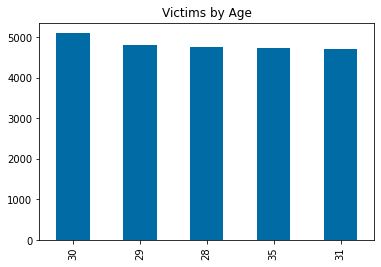

In [ ]:
# victims by age

df['Vict Age'].value_counts().iloc[:5].plot(kind='bar',title="Victims by Age");
df['Vict Age'].value_counts() / df.shape[0]

The results above, in percentual values are: 



*   30 Years, about 3.1%
*   29 Years, about 3.0%
*   28 Years, about 2.9%
*   35 Years, about 2.8%
*   31 Years, about 2.8%

The `Vict Sex` column presented four different categories in the dataset. According to the [Los Angeles Open Data](https://data.lacity.org) in the column description field, there are only three types: Female (F), Male (M), and Unknown (X). Therefore we will not consider the values shown as H in the results.

M    0.518907
F    0.470575
X    0.010422
H    0.000096
Name: Vict Sex, dtype: float64

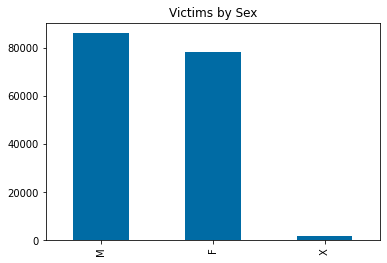

In [ ]:
# victims by sex

df['Vict Sex'].value_counts().iloc[:3].plot(kind='bar', title='Victims by Sex');
df['Vict Sex'].value_counts() / df.shape[0]

The results above in percentual values are:


*   Male (M), about 51.9%
*   Female (F), about 47.1%
*   Unknown (X), about 1.04%





The city of Los Angeles was founded by Spanish discoverers and was also part of the Mexican territory. After the treaty of Guadalupe Hidalgo, the city and the whole State of California was incorporated as American territory. As a result of the process, and other events like the gold rush and petroleum extraction in California, the city of Los Angeles has inherited an enormous ethnic diversity, all this miscegenation is very evident and makes racial conflicts more intense than in other cities.

H    0.401188
W    0.260720
B    0.186889
O    0.089675
A    0.028762
X    0.018443
K    0.005060
F    0.003311
C    0.002611
J    0.001074
V    0.000766
I    0.000639
Z    0.000277
P    0.000241
U    0.000121
G    0.000109
S    0.000048
D    0.000036
L    0.000030
Name: Vict Descent, dtype: float64

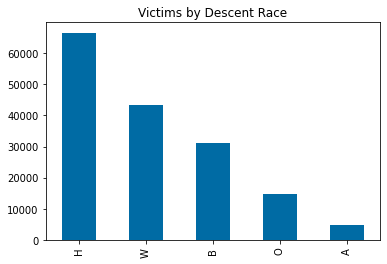

In [ ]:
 # victims by descent race 

df['Vict Descent'].value_counts().iloc[:5].plot(kind='bar',title="Victims by Descent Race");
df['Vict Descent'].value_counts() / df.shape[0]

The results of the graph above exemplify well the diversity present in the city, the percentage values for crimes by ethnicity are as follows:

* Hispanic/Latin/Mexican (H), about 40.1%
* White (W), about 26.1%
* Black (B), about 18.7%
* Other (O), about 8.97%
* Other Asian (A), about 2.88%

### **Crime Analysis**

Regarding the crimes committed in the city of Los Angeles, five types have a greater prominence due to the number of occurrences, among the crimes committed between 2020 and 2021 the most frequent are listed in the chart below.

BATTERY - SIMPLE ASSAULT                                   0.108781
BURGLARY FROM VEHICLE                                      0.083927
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             0.075394
INTIMATE PARTNER - SIMPLE ASSAULT                          0.072836
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    0.064405
                                                             ...   
PANDERING                                                  0.000006
GRAND THEFT / INSURANCE FRAUD                              0.000006
PETTY THEFT - AUTO REPAIR                                  0.000006
TILL TAP - GRAND THEFT ($950.01 & OVER)                    0.000006
LYNCHING - ATTEMPTED                                       0.000006
Name: Crm Cd Desc, Length: 127, dtype: float64

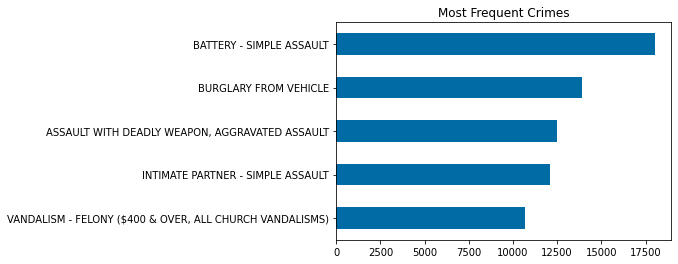

In [ ]:
# most frequent crimes

df['Crm Cd Desc'].value_counts().iloc[:5].sort_values().plot(kind='barh',title="Most Frequent Crimes");
df['Crm Cd Desc'].value_counts() / df.shape[0]

The resuls above, in percentual values are:

* Battery - Simple Assault, about 10.9%
* Burglary from Vehicle, about 8.39%
* Assault With Deadly Weapon, about 7.54%
* Intimidate Partner, about 7.28%
* Vandalism, about 6.44%

The Los Angeles Police Department (LAPD) has a division for the police station by communities, where provides general information and assistance, there are 21 geographical areas citywide. Keep in mind the addresses fields aren't exactly as is, because the LAPD keeps the record to the nearest hundred block to maintain privacy. According to the data frame, the communities where most crimes committed are:

77th Street    0.067632
Southwest      0.062819
Central        0.059665
Pacific        0.055389
Southeast      0.054593
Wilshire       0.051656
Hollywood      0.050612
N Hollywood    0.049400
West LA        0.048290
Topanga        0.046390
Van Nuys       0.046366
Rampart        0.045824
Olympic        0.045353
Newton         0.044931
Mission        0.043073
Harbor         0.041379
Northeast      0.039726
West Valley    0.038966
Devonshire     0.037350
Foothill       0.035420
Hollenbeck     0.035167
Name: AREA NAME, dtype: float64

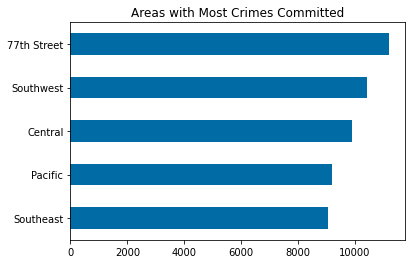

In [ ]:
# areas with most crimes

df['AREA NAME'].value_counts().iloc[:5].sort_values().plot(kind='barh',title="Areas with Most Crimes Committed");
df['AREA NAME'].value_counts() / df.shape[0]

The communities with most incidents in percentual values as shown above are:

* 77th Street Area, about 6.76%
* Southwest Area, about 6.28%
* Central Area, about 5.97%
* Pacific Area, about 5.54%
* Southeast Area, about 5.46%

The laws about the use of guns in Los Angeles allow that you have a gun, but it isn't possible to port it unless you have a permit for that. California state has one of the most rigorous laws for gun control in the country, due to school incidents and mass shootings the laws get stricter.

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    0.249352
UNKNOWN WEAPON/OTHER WEAPON                       0.045419
VERBAL THREAT                                     0.033219
HAND GUN                                          0.024341
KNIFE WITH BLADE 6INCHES OR LESS                  0.009776
                                                    ...   
ANTIQUE FIREARM                                   0.000006
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE     0.000006
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON               0.000006
BLACKJACK                                         0.000006
RELIC FIREARM                                     0.000006
Name: Weapon Desc, Length: 78, dtype: float64

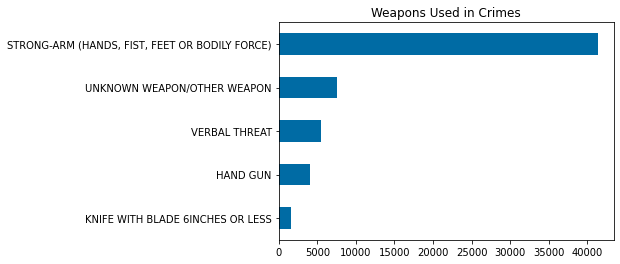

In [ ]:
# weapons used in incidents

df['Weapon Desc'].value_counts().iloc[:5].sort_values().plot(kind='barh',title="Weapons Used in Crimes");
df['Weapon Desc'].value_counts() / df.shape[0]

The graph results, in percentage values, are equal to:

* Strong-Arm, about 24,9%
* Unknown Weapon, about 4.54%
* Verbal Threat, about 3.32%
* Hand Gun, about 2.43%
* Knives, about 0.98%

## **Conclusion**

The use of data science allows us to have an open wide view about many themes, analyzing databases of the past and even of the present, it's possible to extract relevant information to taking decisions. In the specific case of public security, it's possible to identify the places with the most crime incidents, increase gun control and planning strategies to decrease violence, and bring more security for the local people.